In [ ]:
#video tutorial which the code is based upon: https://www.youtube.com/watch?v=kOFUQB7u5Ck&list=WL&index=24&t=205s
#classiefies the handwritten digit images as a number 0 - 9
!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
#import the packages / dependencies
import numpy as np
import mnist #get dataset
import matplotlib.pyplot as plt #Graph
from keras.models import Sequential #ANN Architecture
from keras.utils import to_categorical
from keras.layers import Activation, Dense

In [ ]:
#load the data set
train_images = mnist.train_images() #training data
train_labels = mnist.train_labels() #training labels
test_images = mnist.test_images() #training data images
test_labels = mnist.test_labels() #training data labels

In [ ]:
#normalize the data, pixel values from [0, 255] tp to [-0,5 , 0,5] to make the network easier to train
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
#flatten the images. Flatten each 28x28 image into a 28^2 = 784 dimensional vector to pass to neural network
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#print the shape 
print(train_images.shape) #(60000, 784) rows, cols
print(test_images.shape) #(10000, 784) rows, cols

(60000, 784)
(10000, 784)


In [ ]:
#build the model
# 3 layers, 2 layers with 64 neurons and the relu function
# 1 layer with 10 neurons and softmax function
model = Sequential()
model.add( Dense(64, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='softmax'))

In [ ]:
#Compile the model 
#The loss function measures how well did on training, and then tries to improve on it using optimatization
model.compile(
    optimizer='adam', 
    loss = 'categorical_crossentropy', #classes that are greater than 2
    metrics = ['accuracy']
)

In [ ]:
#train the model
model.fit(
  train_images,
  to_categorical(train_labels) , #Ex. 2 it expects [0,0,1,0,0,0,0,0,0,0]
  epochs = 5, #The number of iterations over the entire dataset to train on
  batch_size = 32 #number of samples to gradient update for training    
)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5837 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2082 - accuracy: 0.9373
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1597 - accuracy: 0.9510
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1288 - accuracy: 0.9607
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1131 - accuracy: 0.9650


In [ ]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9668


[0.11125360429286957, 0.9667999744415283]

In [ ]:
model.save_weights('model.h5')

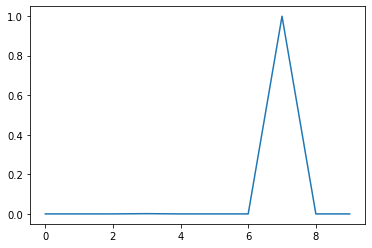

[5.9025388e-07 6.6889907e-06 8.3592582e-05 1.3175507e-03 1.7466099e-09
 3.9542297e-07 3.4726936e-13 9.9858499e-01 3.2075391e-07 5.9878071e-06]
7
9
382


In [ ]:
#predict on the test images
predictions = model.predict(test_images[:10000])

#diagram for first image predictions
plt.plot(predictions[0])
plt.show()

#print our models predictions for first image in numbers
print(predictions[0])
print(test_labels[0])

#goes through all the pictures 
#and finds the golden image (largest predictions certanty) 
#and all predictions that were wrong
maxi = 0
vaarat = []
y = 0
for x in predictions:
  if np.argmax(predictions[y], axis = 0) != test_labels[y]:
    vaarat.append(y)

  else:
    if np.argmax(predictions[y], axis = 0) > maxi:
      maxi = y
      maxik = predictions[y]
  y+=1

#prints the best ones place in array 
print(maxi)
#and prints the number of predictions that were wrong
print("there were "+len(vaarat)+"wrong ones")

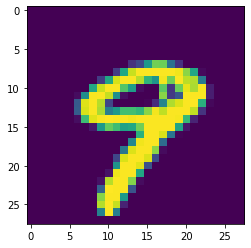

9


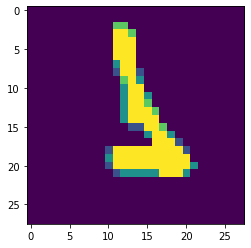

6
1


In [ ]:
#Best image according to the neuro network from the test images
golden_image = test_images[9]
golden_image = np.array(golden_image, dtype='float')
pixels = golden_image.reshape((28,28))
plt.imshow(pixels)
plt.show()
print(test_labels[9])
# Picture that the the neuro network was most unsure of and wrong
bad_image = test_images[vaarat[33]]
bad_image = np.array(bad_image, dtype='float')
pixels = bad_image.reshape((28,28))
plt.imshow(pixels)
plt.show()
#What it thought it was
print(np.argmax(predictions[vaarat[33]], axis = 0))
#What it was
print(test_labels[vaarat[33]])